# Chapter 9 - Buoys and Lights

This chapter departs from the previous formats in a couple of ways.

This time we are also using the raku Math::Polygons module to help us with some drawings.

We need to use basic polygon shapes such as Rectangle and Triangle to create our figures. (The Polygons.ipynb and Tree.ipynb notebooks give some more examples).

In [1]:
use Physics::Navigation;
use Physics::Measure;
use Math::Polygons;

Sadly the Math::Polygons module does not include a Circle class. We need an animated one to display our flashing light examples. Luckily we can make our own.

Did I say Animated, oh we also need to make a role for that! 

In [2]:
role Animated {
    has @.pattern  = <#800 #f00 #800 #800>;
    has $.duration = 2;
    
    method animate {
        animate => [ attributeName => "fill",   values => @!pattern.join(';'),
                     dur => ($!duration ~ "s"), repeatCount => "indefinite" ];
    }
}

(Animated)

The ```does``` keyword brings our Animated role into play. We are using ```does Element does Styled``` to bring in the other behaviours we need to draw and format our Circles.

In [3]:
class Circle does Element does Styled does Animated {
    has Point $.centre;
    has       $.radius;

    method serialize {
        circle => [ cx => $!centre.x, cy => $!centre.y, r => $!radius, 
                      self.animate, |self.styles ];
    }
}

(Circle)

In [4]:
my $circle = Circle.new(
    centre => Point.new(80, 380),
    radius => 30
);

my $rectangle = Rectangle.new( 
    origin => Point.new(20, 20),
    width  => 120, 
    height => 80  
);

my $square = Square.new( 
    origin => Point.new(170, 20),
    side   => 100 
);

my \A = Point.new( 20, 260);
my \B = Point.new( 30, 200);
my \C = Point.new(120, 145);
my \D = Point.new(125, 250);
my $quadrilateral = Quadrilateral.new(
    A, B, C, D,  
);

my $triangle = Triangle.new(
    fill => "green",
    stroke => "black",
    apex => Point.new(220, 160),
    side => 100 
);

Math::Polygons::Triangle.new(apex => Math::Polygons::Point.new(x => 220, y => 160), side => 100, points => Array[Math::Polygons::Point].new(), fill => "green", stroke => "black", stroke-width => 3)

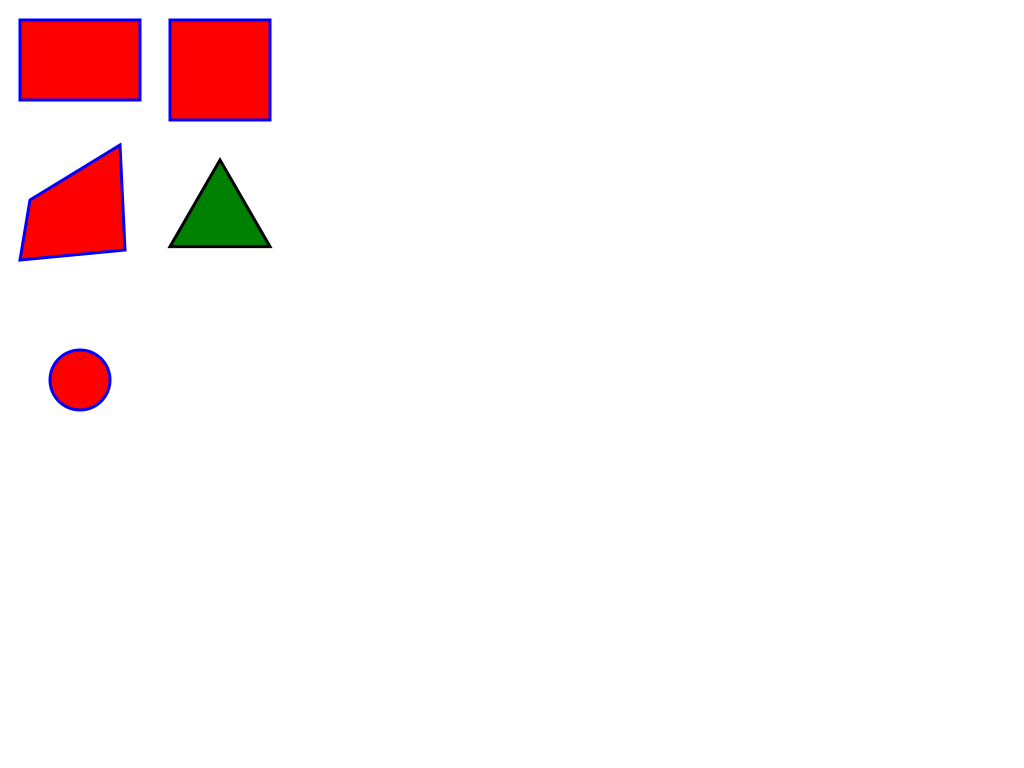

In [5]:
my $drawing = Drawing.new( 
    elements => [
        $circle,
        $rectangle, 
        $square,
        $quadrilateral,
        $triangle,
    ],
);
$drawing.serialize.say;

In [ ]:
<svg width="320" height="320" viewBox="0 0 320 320">
<circle fill="none" stroke="#000" stroke-width="4" cx="50" cy="50" r="48" stroke-dasharray="360" stroke-linecap="round" transform="rotate(-90 ) translate(-100 0)" >
        <animate attributeName="fill" values="#800;#f00;#800;#800" dur="2s" repeatCount="indefinite"></animate>
</circle>
</svg>